In [1]:
!pip install yellowbrick
#Import the necesary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import dotenv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")


data = pd.read_csv(r"C:\Users\laura\Desktop\ironhack\Web-Scrapping\lab-api-wrappers\lab-API-wrappers.csv")
data

,Canción,Artista,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Três Dias,Marcelo Camelo,0.291,0.319,7,-10.465,1,0.0306,0.79100,0.46800,0.0692,0.038,103.793,audio_features,0A0eOcimSNRs2EQQlH7FFJ,spotify:track:0A0eOcimSNRs2EQQlH7FFJ,https://api.spotify.com/v1/tracks/0A0eOcimSNRs...,https://api.spotify.com/v1/audio-analysis/0A0e...,323280,3
1,Elephant Gun,Beirut,0.171,0.626,8,-8.677,1,0.0486,0.87300,0.02520,0.0681,0.457,180.098,audio_features,0MtVmhAx6CxNuxFIUc6Mj9,spotify:track:0MtVmhAx6CxNuxFIUc6Mj9,https://api.spotify.com/v1/tracks/0MtVmhAx6CxN...,https://api.spotify.com/v1/audio-analysis/0MtV...,348893,3
2,Fake Empire,The National,0.324,0.776,0,-6.784,1,0.0346,0.15100,0.91700,0.0728,0.317,101.964,audio_features,6aUAF8JOd8zEl41B6I18xL,spotify:track:6aUAF8JOd8zEl41B6I18xL,https://api.spotify.com/v1/tracks/6aUAF8JOd8zE...,https://api.spotify.com/v1/audio-analysis/6aUA...,205040,3
3,Sorriso ao Sono,Phill Veras,0.627,0.342,2,-12.833,1,0.0394,0.70000,0.16600,0.0820,0.513,80.030,audio_features,2vGvPQNnyybJmiqpr1HiKX,spotify:track:2vGvPQNnyybJmiqpr1HiKX,https://api.spotify.com/v1/tracks/2vGvPQNnyybJ...,https://api.spotify.com/v1/audio-analysis/2vGv...,248480,4
4,I Will Wait,Mumford & Sons,0.486,0.769,1,-5.140,1,0.0341,0.01190,0.00832,0.1970,0.393,131.286,audio_features,1PuLHwFZoh5qYK89I5YBdZ,spotify:track:1PuLHwFZoh5qYK89I5YBdZ,https://api.spotify.com/v1/tracks/1PuLHwFZoh5q...,https://api.spotify.com/v1/audio-analysis/1PuL...,276720,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Daft Punk,Pentatonix,0.717,0.621,11,-7.588,0,0.0605,0.00403,0.00000,0.1440,0.720,133.014,audio_features,6ukvsBzq4d1vBsAUmz7ZVt,spotify:track:6ukvsBzq4d1vBsAUmz7ZVt,https://api.spotify.com/v1/tracks/6ukvsBzq4d1v...,https://api.spotify.com/v1/audio-analysis/6ukv...,248560,4
213,YEAH RIGHT,Joji,0.672,0.588,1,-9.573,1,0.1330,0.61900,0.24100,0.0992,0.204,169.033,audio_features,1VGzxJnVQND7Cg5H5wGj14,spotify:track:1VGzxJnVQND7Cg5H5wGj14,https://api.spotify.com/v1/tracks/1VGzxJnVQND7...,https://api.spotify.com/v1/audio-analysis/1VGz...,174358,4
214,Allen Page's Midnight Ride,Panucci's Pizza,0.558,0.448,5,-6.522,1,0.0410,0.50600,0.00000,0.0898,0.159,117.984,audio_features,2EYMmP358cUvHnTUHh8dJQ,spotify:track:2EYMmP358cUvHnTUHh8dJQ,https://api.spotify.com/v1/tracks/2EYMmP358cUv...,https://api.spotify.com/v1/audio-analysis/2EYM...,114590,3
215,This Bitter Pill,Dashboard Confessional,0.544,0.380,6,-9.219,1,0.0251,0.64300,0.00000,0.1150,0.390,63.330,audio_features,3tEJXdNmXzu5Pcrgq9IKjv,spotify:track:3tEJXdNmXzu5Pcrgq9IKjv,https://api.spotify.com/v1/tracks/3tEJXdNmXzu5...,https://api.spotify.com/v1/audio-analysis/3tEJ...,193773,4


In [2]:
# Selecciona solo las columnas numéricas para escalar
numeric_columns = data.select_dtypes(include=['int', 'float']).columns

# Escala los datos
scaler = StandardScaler()
X_prep = scaler.fit_transform(data[numeric_columns])


In [3]:
# Crea una instancia de KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajusta el modelo KMeans a los datos escalados
kmeans.fit(X_prep)

KMeans(n_clusters=5, random_state=42)

In [4]:
# predecir |  asignar clusters:
clusters = kmeans.predict(X_prep)
clusters

array([0, 3, 0, 1, 3, 3, 3, 1, 3, 1, 4, 1, 3, 3, 2, 0, 1, 4, 0, 0, 1, 4,
       3, 3, 1, 4, 1, 4, 1, 3, 3, 3, 3, 1, 3, 0, 3, 3, 1, 1, 3, 4, 0, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 1, 0, 0, 3, 0, 3, 1, 4, 3, 0,
       1, 3, 1, 1, 0, 3, 3, 2, 3, 3, 2, 4, 0, 1, 1, 1, 1, 3, 0, 1, 1, 4,
       3, 1, 1, 3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 4, 3, 1, 0, 4, 1, 1, 1, 4,
       3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 4, 1, 1, 4, 1, 1, 1, 3, 4, 1, 4,
       1, 3, 3, 1, 3, 3, 1, 1, 3, 4, 4, 1, 0, 1, 1, 0, 3, 0, 1, 1, 1, 2,
       1, 0, 4, 3, 1, 3, 3, 3, 1, 2, 3, 3, 0, 3, 0, 0, 3, 0, 1, 1, 0, 4,
       3, 1, 2, 1, 1, 3, 4, 3, 2, 0, 4, 4, 1, 3, 3, 3, 2, 3, 3, 1, 4, 2,
       2, 2, 4, 3, 3, 1, 3, 1, 2, 3, 3, 2, 2, 3, 4, 3, 3, 1, 1])

In [5]:
# ver el tamaño de los clusters
pd.Series(clusters).value_counts().sort_index()

0    29
1    83
2    14
3    63
4    28
dtype: int64

In [6]:
# Explore the cluster assignment in the original dataset
X_df = data
X_df["cluster"] = clusters
X_df.head()

X_df['cluster'] = X_df['cluster'].apply(lambda x: 0 if x == 1 else 1 if x == 2 else 2)
X_df

,Canción,Artista,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,Três Dias,Marcelo Camelo,0.291,0.319,7,-10.465,1,0.0306,0.79100,0.46800,...,0.038,103.793,audio_features,0A0eOcimSNRs2EQQlH7FFJ,spotify:track:0A0eOcimSNRs2EQQlH7FFJ,https://api.spotify.com/v1/tracks/0A0eOcimSNRs...,https://api.spotify.com/v1/audio-analysis/0A0e...,323280,3,2
1,Elephant Gun,Beirut,0.171,0.626,8,-8.677,1,0.0486,0.87300,0.02520,...,0.457,180.098,audio_features,0MtVmhAx6CxNuxFIUc6Mj9,spotify:track:0MtVmhAx6CxNuxFIUc6Mj9,https://api.spotify.com/v1/tracks/0MtVmhAx6CxN...,https://api.spotify.com/v1/audio-analysis/0MtV...,348893,3,2
2,Fake Empire,The National,0.324,0.776,0,-6.784,1,0.0346,0.15100,0.91700,...,0.317,101.964,audio_features,6aUAF8JOd8zEl41B6I18xL,spotify:track:6aUAF8JOd8zEl41B6I18xL,https://api.spotify.com/v1/tracks/6aUAF8JOd8zE...,https://api.spotify.com/v1/audio-analysis/6aUA...,205040,3,2
3,Sorriso ao Sono,Phill Veras,0.627,0.342,2,-12.833,1,0.0394,0.70000,0.16600,...,0.513,80.030,audio_features,2vGvPQNnyybJmiqpr1HiKX,spotify:track:2vGvPQNnyybJmiqpr1HiKX,https://api.spotify.com/v1/tracks/2vGvPQNnyybJ...,https://api.spotify.com/v1/audio-analysis/2vGv...,248480,4,0
4,I Will Wait,Mumford & Sons,0.486,0.769,1,-5.140,1,0.0341,0.01190,0.00832,...,0.393,131.286,audio_features,1PuLHwFZoh5qYK89I5YBdZ,spotify:track:1PuLHwFZoh5qYK89I5YBdZ,https://api.spotify.com/v1/tracks/1PuLHwFZoh5q...,https://api.spotify.com/v1/audio-analysis/1PuL...,276720,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Daft Punk,Pentatonix,0.717,0.621,11,-7.588,0,0.0605,0.00403,0.00000,...,0.720,133.014,audio_features,6ukvsBzq4d1vBsAUmz7ZVt,spotify:track:6ukvsBzq4d1vBsAUmz7ZVt,https://api.spotify.com/v1/tracks/6ukvsBzq4d1v...,https://api.spotify.com/v1/audio-analysis/6ukv...,248560,4,2
213,YEAH RIGHT,Joji,0.672,0.588,1,-9.573,1,0.1330,0.61900,0.24100,...,0.204,169.033,audio_features,1VGzxJnVQND7Cg5H5wGj14,spotify:track:1VGzxJnVQND7Cg5H5wGj14,https://api.spotify.com/v1/tracks/1VGzxJnVQND7...,https://api.spotify.com/v1/audio-analysis/1VGz...,174358,4,2
214,Allen Page's Midnight Ride,Panucci's Pizza,0.558,0.448,5,-6.522,1,0.0410,0.50600,0.00000,...,0.159,117.984,audio_features,2EYMmP358cUvHnTUHh8dJQ,spotify:track:2EYMmP358cUvHnTUHh8dJQ,https://api.spotify.com/v1/tracks/2EYMmP358cUv...,https://api.spotify.com/v1/audio-analysis/2EYM...,114590,3,2
215,This Bitter Pill,Dashboard Confessional,0.544,0.380,6,-9.219,1,0.0251,0.64300,0.00000,...,0.390,63.330,audio_features,3tEJXdNmXzu5Pcrgq9IKjv,spotify:track:3tEJXdNmXzu5Pcrgq9IKjv,https://api.spotify.com/v1/tracks/3tEJXdNmXzu5...,https://api.spotify.com/v1/audio-analysis/3tEJ...,193773,4,0


In [7]:
# "performance metric"
kmeans.inertia_

1961.8664606336881

In [8]:
import numpy as np

K = range(2, 20)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

inertia

[2423.2628929370344,
 2243.9134051035207,
 2094.7403388817734,
 1979.8881769927045,
 1835.0728809036025,
 1742.6399173178402,
 1667.9064254920418,
 1590.1039700294677,
 1508.9116316265392,
 1459.9132357129074,
 1429.5610194776214,
 1407.25818232426,
 1357.512597438009,
 1324.5784940648218,
 1266.2600510356624,
 1245.9136906287656,
 1234.3203633586656,
 1182.9446063821617]

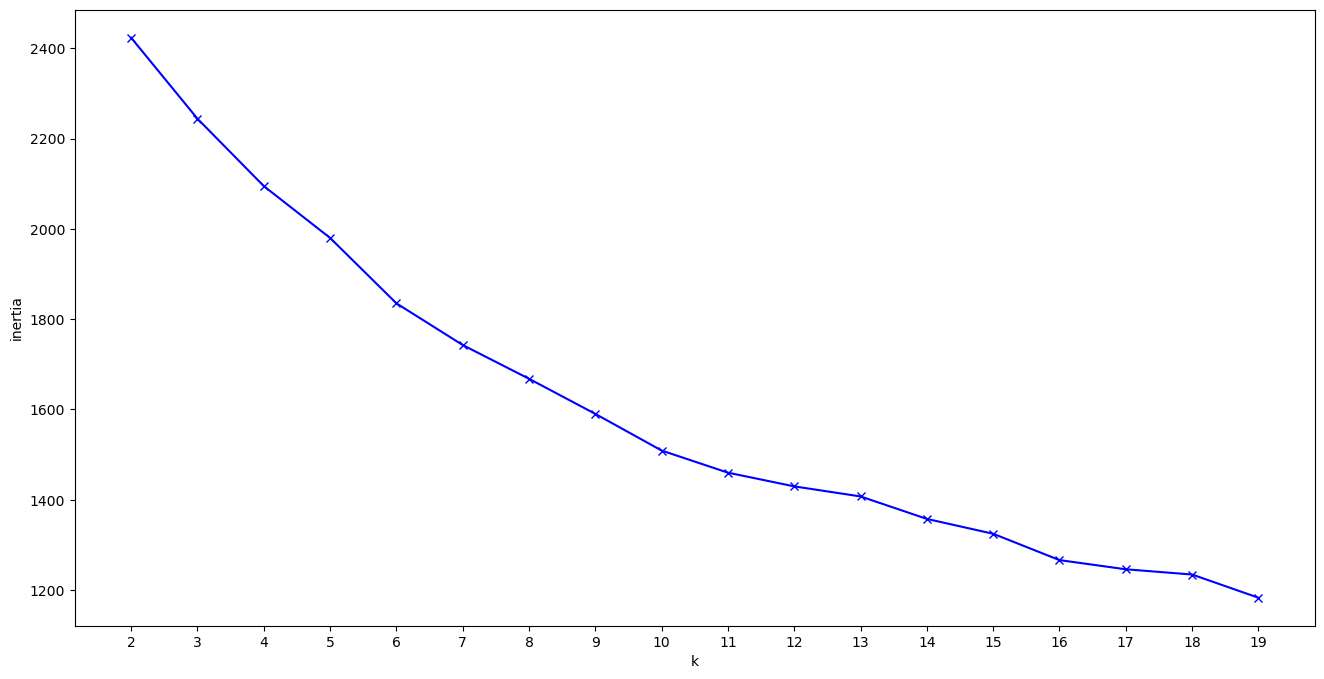

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

In [10]:
#Checking the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_prep)
    wcss.append(kmeans.inertia_)

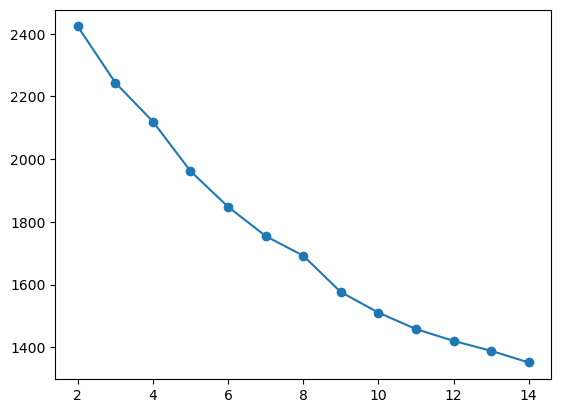

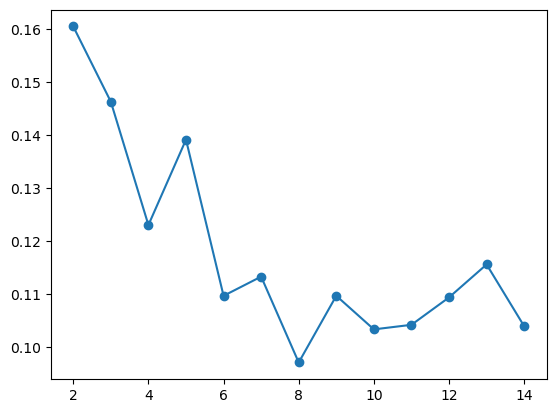

In [13]:
inertia = []
silhouette_scores = []
ranges = range(2,15)

for k in ranges:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_prep)
    inertia.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X_prep, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.plot(ranges,inertia, marker = "o")
plt.show()

plt.plot(ranges, silhouette_scores, marker="o") 

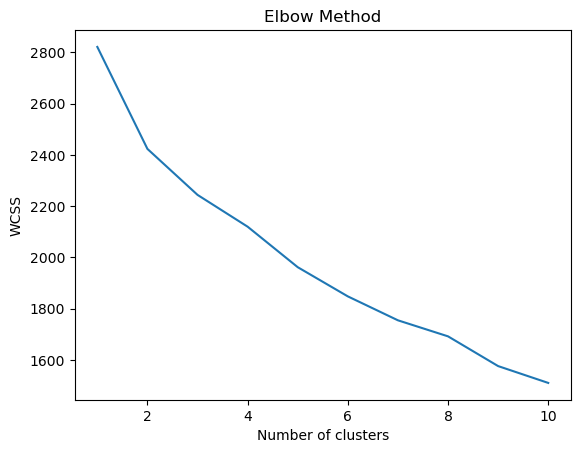

In [14]:
#Plotting the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

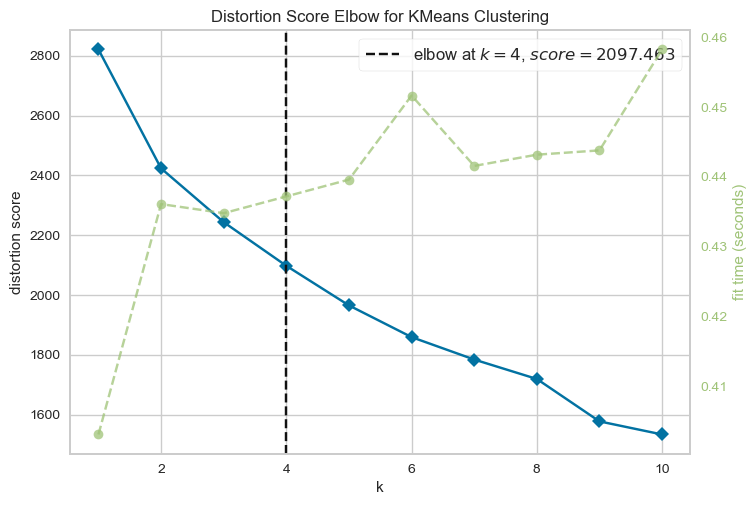

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
#Plotting using Yellowbrick
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(X_prep)
visualizer.show()

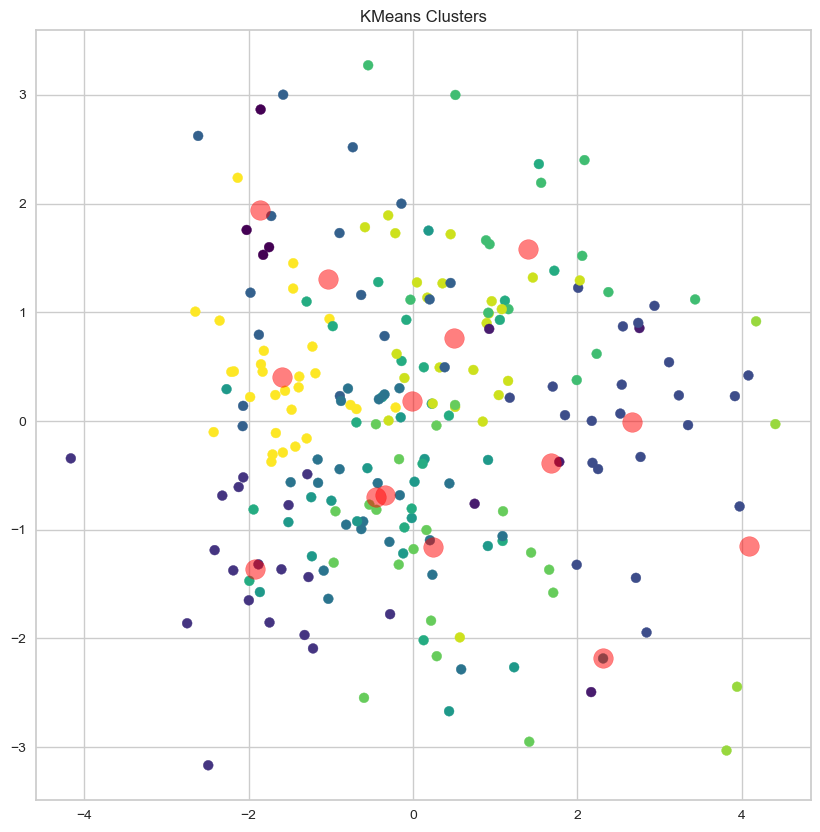

In [16]:
#Plotting the clusters and its centroids
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_prep)
pca_centers = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans Clusters')
plt.show()

In [17]:
#Trying to cluster the data using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(X_prep)
data['cluster_dbscan'] = dbscan.labels_

data['cluster_dbscan'].value_counts()

-1    217
Name: cluster_dbscan, dtype: int64

In [18]:
#Trying to cluster the data using Gaussian Mixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X_prep)
data['cluster_gmm'] = gmm.predict(X_prep)

data['cluster_gmm'].value_counts()

1    163
2     33
0     21
Name: cluster_gmm, dtype: int64

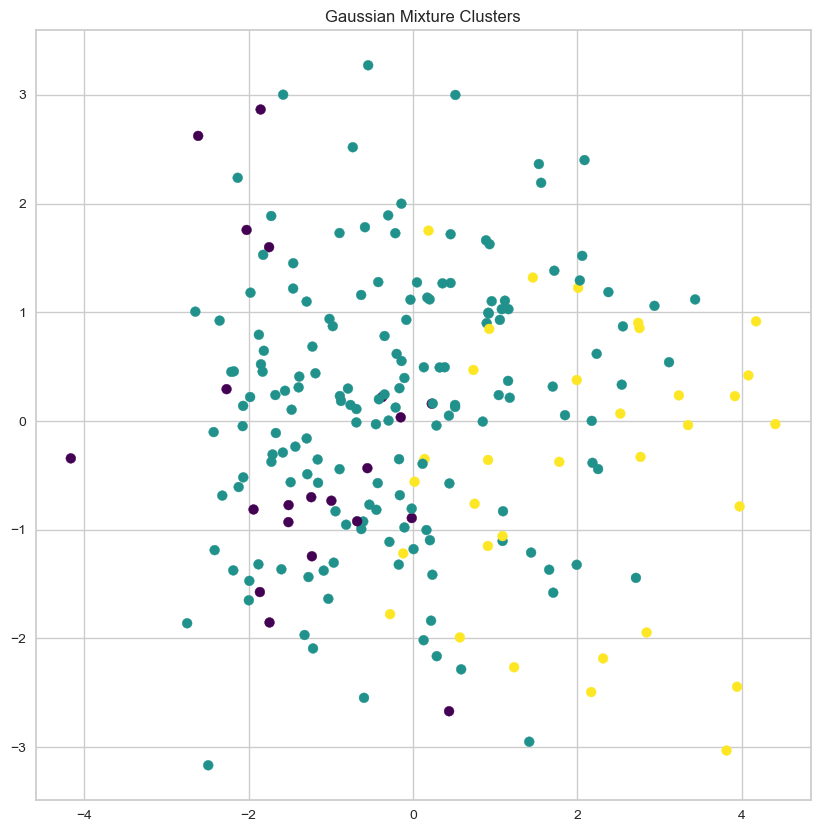

In [19]:

#Plotting the clusters and its centroids
plt.figure(figsize=(10, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=gmm.predict(X_prep), s=50, cmap='viridis')
plt.title('Gaussian Mixture Clusters')
plt.show()

In [27]:
#Creating a function to search for a song in the dataframe and return the cluster
def get_cluster(song):
    try:
        return data[data['Canción'] == song]['cluster'].values[0]
    except:
        return None

In [28]:
#Finally we can test the function
get_cluster('Fake Empire')

2